# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd



In [8]:
  
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv') 
print(df_raw)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
df_transform=df_raw.drop(['Cabin','PassengerId','Ticket','Name'],axis=1)

In [23]:
df=df_transform.copy()

In [24]:
X=df.drop(['Survived'],axis=1)

In [25]:
y=df['Survived']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=70)

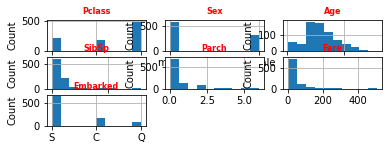

In [27]:
for index, i in enumerate(X):
    plt.subplot(6,3,index+1) 
    df1=df[i].hist()
    df1.plot(kind='bar')
    plt.title(f"{i}", fontsize=8, color= 'red', fontweight='bold')
    plt.ylabel('Count')
plt.Figure(figsize=(16,16))    
plt.show()

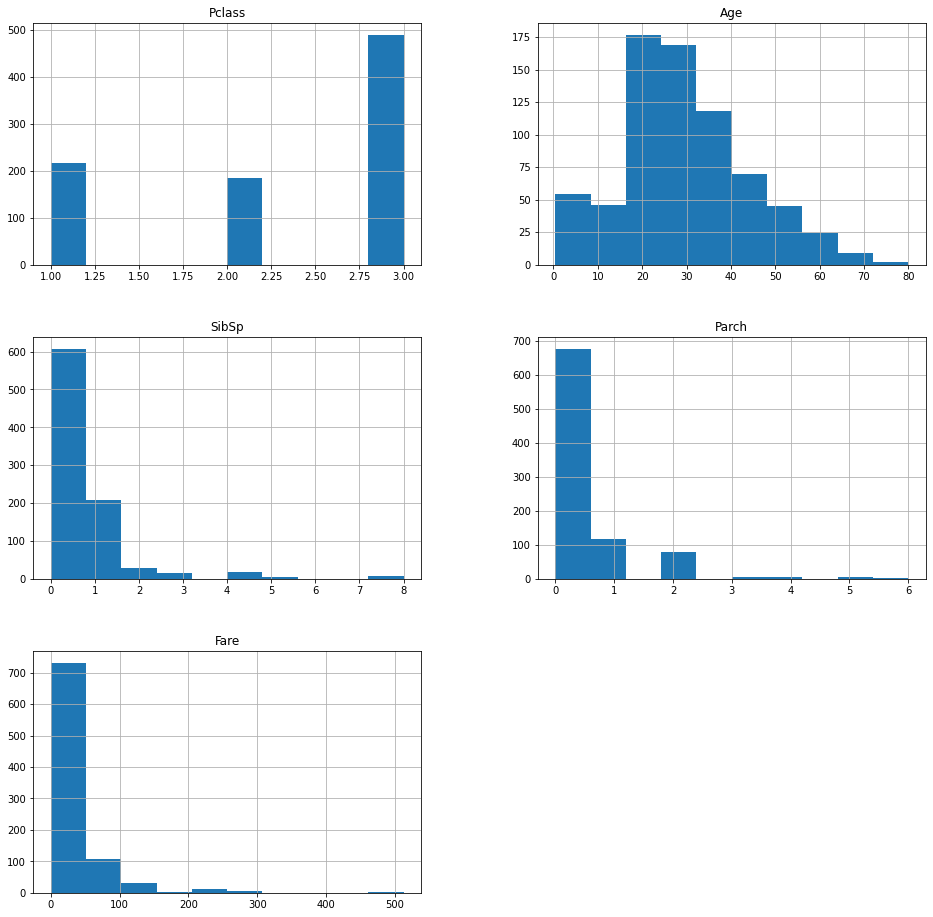

In [28]:
X.hist(figsize=(16,16))
plt.show()

In [ ]:
# grafica de boxplot

